In [2]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
import json as js
from scipy.stats import gaussian_kde

# Set a compatible renderer
pio.renderers.default = 'browser'  # Opens the chart in your default web browser
style_head = f'style="font-size: 32px; font-family: Helvetica"'
alpha = 0.05

In [3]:
world_cup_df = pd.read_csv('../data/matches_world_cup.csv')
world_cup_df.head()

,id,home_team,away_team,result_full,goal_home_ft,home_fouls_conceded,away_fouls_conceded,home_shots_on_target,away_shots_on_target
0,1,QAT,ECU,0-2,-2,NaN,NaN,NaN,NaN
1,2,ENG,IRN,6-2,4,12.0,9.0,13.0,8.0
2,3,SEN,NED,0-2,-2,13.0,13.0,14.0,9.0
3,4,USA,WAL,1-1,0,9.0,14.0,6.0,7.0
4,5,ARG,KSA,1-2,-1,21.0,6.0,14.0,3.0


In [4]:
df = pd.read_csv('../data/df_full_premierleague.csv')
df.head(2)

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2


In [5]:
# join the two dataframes , by union them together
#df = pd.concat([df, world_cup_df], axis=0)
laliga_df = pd.read_csv('../data/combined_data_laliga_tranform.csv')
df = pd.concat([df, laliga_df], axis=0)

In [6]:
df.tail(2)

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,Home Team Aerials Won,Home Team Second Yellow Cards,away_shots.1,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Second Yellow Cards,Home Team Goals Conceeded,Away Team Goals Conceeded,home_shots.1
2658,2658,NaN,2020,NaN,GRANADA,GETAFE,0-0,0-0,23.0,6.0,...,14.0,0.0,11.0,27.0,71.0,26.0,0.0,0.0,0.0,8.0
2659,2659,NaN,2020,NaN,SEVILLA FC,ALAVÉS,1-0,0-0,14.0,6.0,...,18.0,0.0,11.0,21.0,74.0,15.0,0.0,0.0,1.0,8.0


In [7]:
def fig_to_json_file(fig, filename):
    fig_json = fig.to_json()
    with open(f'../graphs/{filename}.json', mode='w') as f:
        
        f.write(js.dumps(js.loads(fig_json), indent=2))

        


In [8]:
# Create the 'result' column
def determine_result(row):
    if row['goal_home_ft'] > row['goal_away_ft']:
        return 'HW'  # Home Win
    elif row['goal_home_ft'] < row['goal_away_ft']:
        return 'AW'  # Away Win
    else:
        return 'D'   # Draw

# Apply the function to each row
df['result'] = df.apply(determine_result, axis=1)

### Anova test
Anova test is used to compare the means of more than two groups. It is an extension of the t-test. The null hypothesis is that all groups have the same mean. The alternative hypothesis is that at least one group has a different mean. The test statistic is the F-statistic. The p-value is the probability of observing the data given that the null hypothesis is true. If the p-value is less than the significance level, we reject the null hypothesis.

In [9]:


# Calculate win probabilities
home_wins = df[df['result'] == 'HW'].shape[0]
away_wins = df[df['result'] == 'AW'].shape[0]
total_matches = df.shape[0]

home_win_prob = home_wins / total_matches
away_win_prob = away_wins / total_matches

# Create a DataFrame with probabilities for ANOVA
anova_df = pd.DataFrame({
    'Type': ['Home', 'Away'],
    'Probability': [home_win_prob, away_win_prob]
})

# Perform ANOVA
f_stat, p_value = f_oneway([home_win_prob] * home_wins, [away_win_prob] * away_wins)
title = f"F-statistic: {f_stat}, P-value: {p_value}"
sig = p_value < alpha
description = f'' 
print(title)
if p_value < alpha:
    description = "There is a significant difference in the probability of winning between Home and Away teams."
else:
    description = "There is no significant difference in the probability of winning between Home and Away teams."
print(description)

F-statistic: inf, P-value: 0.0
There is a significant difference in the probability of winning between Home and Away teams.


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/scipy/stats/_stats_py.py:3906: ConstantInputWarning:

Each of the input arrays is constant;the F statistic is not defined or infinite



In [10]:
# This is in plotly and show in the browser
# Count occurrences of each result
result_counts = df['result'].value_counts().reset_index()
result_counts.columns = ['Result', 'Count']

# Create a Plotly pie chart
fig = px.pie(result_counts, 
             values='Count', 
             names='Result', 
             title=f'''<span >Match Result Distribution</span><br>{title}<br><sub>{description}</sub>''', 
             hole=0.3)  # Set hole > 0 for a donut chart

fig.show()
fig_to_json_file(fig, 'match_result_distribution')

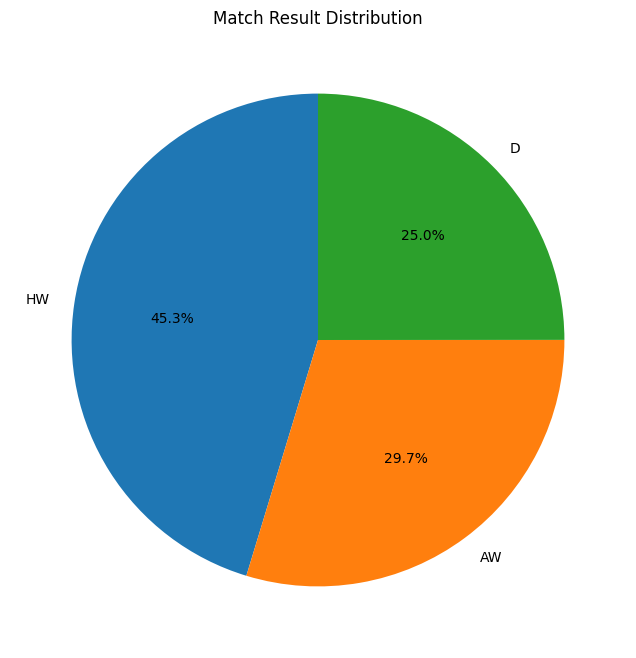

In [11]:
# Count occurrences of each result
result_counts = df['result'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Match Result Distribution')
plt.show()


### Fouls conceded by players
* we wanted to check if there is a relationship between the number of fouls conceded by players to the team winning chances.


In [69]:
# Group by fouls conceded and calculate metrics
fouls_analysis = df.groupby('home_fouls_conceded').agg(
    matches=('result', 'count'),
    home_wins=('result', lambda x: (x == 'HW').sum()),
    avg_goal_difference=('sg_match_ft', 'mean')
).reset_index()

# Calculate win probability
fouls_analysis['win_probability'] = fouls_analysis['home_wins'] / fouls_analysis['matches']

# View the analysis DataFrame
# Correlation between fouls and win probability
corr_fouls_win_prob, p_value1 = pearsonr(fouls_analysis['home_fouls_conceded'], fouls_analysis['win_probability'])

# Correlation between fouls and goal difference
corr_fouls_goal_diff, p_value2 = pearsonr(fouls_analysis['home_fouls_conceded'], fouls_analysis['avg_goal_difference'])

print(f"Correlation between fouls and win probability: {corr_fouls_win_prob} (p-value: {p_value1})")
print(f"Correlation between fouls and goal difference: {corr_fouls_goal_diff} (p-value: {p_value2})")
if p_value2 < alpha:
    description = "There is a significant correlation between fouls conceded and average winning chances."
else:
    description = "There is no significant correlation between fouls conceded and average winning chances."


Correlation between fouls and win probability: 0.023418682643639555 (p-value: 0.9004852613734917)
Correlation between fouls and goal difference: -0.1539105585890913 (p-value: 0.4084269805468498)


In [70]:
# rows_with_nan = fouls_analysis[fouls_analysis['avg_goal_difference'].isna()]

rows_with_nan = df[df['sg_match_ft'].isna()]
rows_with_nan

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,Away Team Goals Conceeded,home_shots.1,result,possession_bin,home_shots_diff,shooting_accuracy_home,shooting_accuracy_away,shooting_accuracy_home_bin,shooting_accuracy_away_bin,win


In [71]:
# Calculate total fouls for each goal difference
fouls_vs_goal_diff = df.groupby('sg_match_ft').agg(
    total_fouls=('home_fouls_conceded', 'sum'),
    total_matches=('sg_match_ft', 'count')
).reset_index()

# Plot total fouls vs. goal difference
fig = px.bar(fouls_vs_goal_diff,
             x='sg_match_ft',
             y='total_fouls',
             title=f'<span {style_head}>Total Fouls vs. Goal Difference</span><br>{description}',
             labels={'sg_match_ft': 'Goal Difference', 'total_fouls': 'Total Fouls'},
             text='total_fouls')

# Add a line chart for total matches to give context (optional)
fig.update_traces(textposition='outside')
fig.update_layout(xaxis=dict(title='Goal Difference (sg_match_ft)'),
                  yaxis=dict(title='Total Fouls'),
                  showlegend=False)
fig.show()
fig_to_json_file(fig, 'total_fouls_vs_goal_diff')

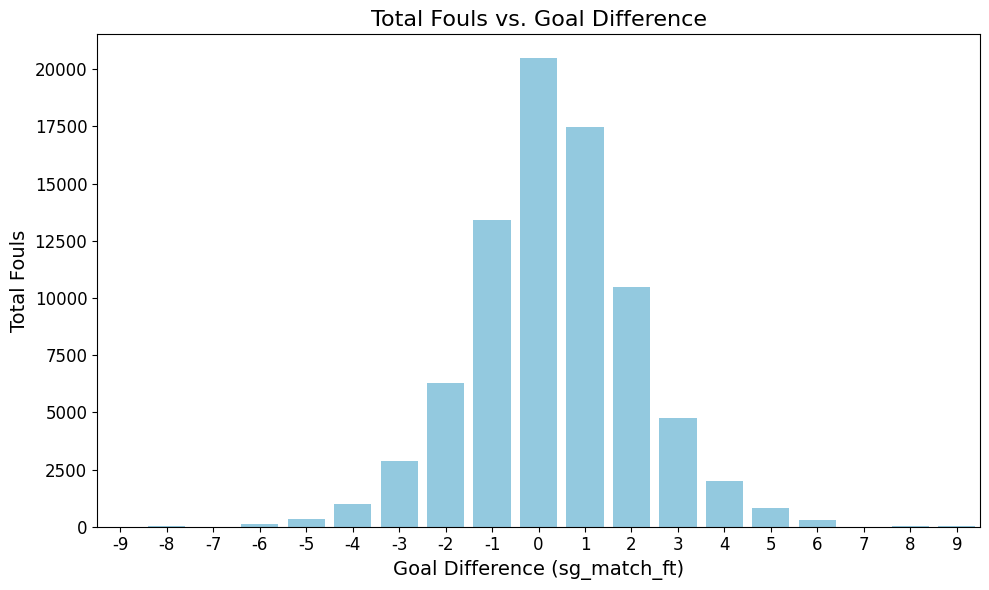

In [15]:
# Create the Seaborn barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='sg_match_ft', 
    y='total_fouls', 
    data=fouls_vs_goal_diff, 
    color='skyblue'
)

# Add titles and labels
plt.title('Total Fouls vs. Goal Difference', fontsize=16)
plt.xlabel('Goal Difference (sg_match_ft)', fontsize=14)
plt.ylabel('Total Fouls', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### Possession of the ball to the team winning chances
* we wanted to check if there is a relationship between the possession of the ball to the team winning chances.

In [73]:
# Filter possession data based on match outcome
home_win_possession = df[df['result'] == 'HW']['home_possession'].dropna()
away_win_possession = df[df['result'] == 'AW']['away_possession'].dropna()
draw_home_possession = df[df['result'] == 'D']['away_possession'].dropna()
# list(draw_home_possession)
# Perform ANOVA test
f_stat, p_value = f_oneway(home_win_possession, away_win_possession)
title = f"F-statistic: {f_stat:.3f}, P-value: {p_value:.4f}"
description = f'' 
print(title)
if p_value < alpha:
    description = "There is a significant difference in possession percentages between match outcomes."
else:
    description = "There is no significant difference in possession percentages between match outcomes."
print(description)

F-statistic: 38.789, P-value: 0.0000
There is a significant difference in possession percentages between match outcomes.


In [74]:
# Define bins for possession percentage
bins = np.arange(0, 101, 5)  # Create bins from 0% to 100% in increments of 5
df['possession_bin'] = pd.cut(df['home_possession'], bins, right=False)

# Calculate total games and wins for each possession bin
game_data = df.groupby('possession_bin').size().reset_index(name='total_games')
win_data = df[df['result'] == 'HW'].groupby('possession_bin').size().reset_index(name='home_wins')

# Merge the two DataFrames
data = pd.merge(game_data, win_data, on='possession_bin', how='left')
data['home_wins'] = data['home_wins'].fillna(0)  # Replace NaN with 0 for bins with no wins

# Calculate the win rate
data['win_rate'] = data['home_wins'] / data['total_games']

# Convert bin intervals to numeric (midpoints) for plotting
data['possession_mid'] = data['possession_bin'].apply(lambda x: x.mid)

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_1468/82229308.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_1468/82229308.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [75]:
data.dropna(subset=['win_rate'], inplace=True)

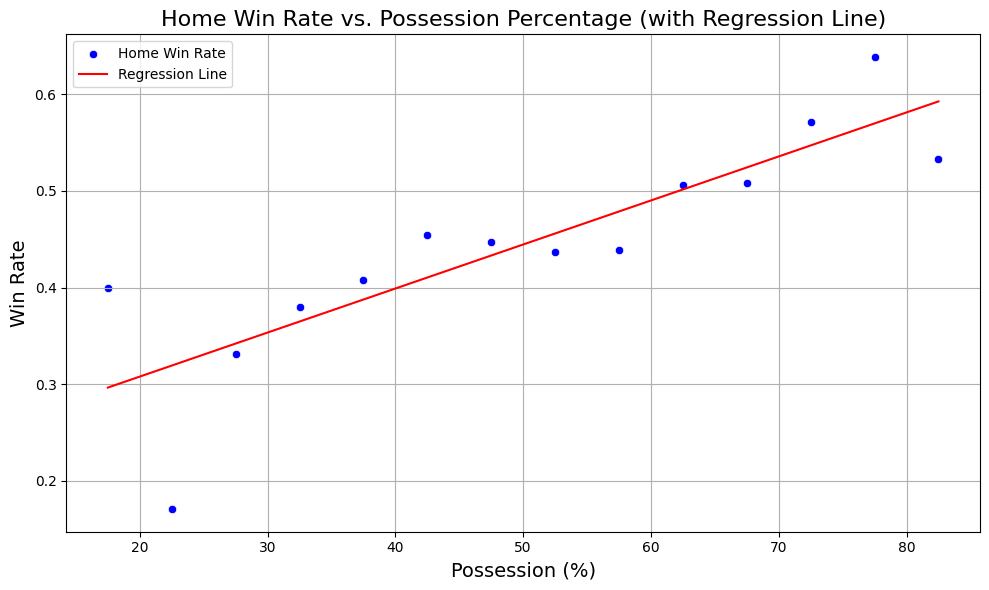

Regression equation: y = 0.0046x + 0.2167


In [76]:
# Prepare data for regression
X = data['possession_mid'].values.reshape(-1, 1)  # Reshape for sklearn
y = data['win_rate'].values

# Fit a linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Predict the regression line
data['regression_line'] = reg_model.predict(X)

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))

sns.scatterplot(data=data, x='possession_mid', y='win_rate', label='Home Win Rate', color='blue')
sns.lineplot(data=data, x='possession_mid', y='regression_line', label='Regression Line', color='red')

# Customize the plot
plt.title(f'Home Win Rate vs. Possession Percentage (with Regression Line)', fontsize=16)
plt.xlabel('Possession (%)', fontsize=14)
plt.ylabel('Win Rate', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print regression equation
print(f"Regression equation: y = {reg_model.coef_[0]:.4f}x + {reg_model.intercept_:.4f}")

In [81]:
# Create the Plotly figure
fig = go.Figure()

# Scatter plot for win rates
fig.add_trace(go.Scatter(
    x=data['possession_mid'],
    y=data['win_rate'],
    mode='markers',
    name='Home Win Rate',
    marker=dict(color='blue')
))

# Add the regression line
fig.add_trace(go.Scatter(
    x=data['possession_mid'],
    y=data['regression_line'],
    mode='lines',
    name='Regression Line',
    line=dict(color='red', width=2)
))

fig.update_layout(
    title=f'<span {style_head}>Home Win Rate vs. Possession Percentage</span><br>{title}<br><sub>{description}</sub>',
    xaxis_title='Possession (%)',
    yaxis_title='Win Rate',
    legend=dict(x=0.1, y=0.9),
    template='plotly_white'
)
fig.show()
fig_to_json_file(fig, 'home_win_rate_vs_possession')


In [80]:
data.to_excel('../data/home_win_rate_vs_possession.xlsx', sheet_name='regression')

### Clearances and shots made by players
* we are checking the relationship between the number of clearances and shots made by players to the team winning chances.


### difference between the shots among the home and away team and the winning chances

In [115]:
# difference between the shots among the home and away team and the winning team
df['home_shots_diff'] = df['home_shots_on_target'] - df['away_shots_on_target']
# Group by the number of shots
shots_diff_data = df.groupby('home_shots_diff').agg(
    total_games=('result', 'size'),
    wins=('result', lambda x: (x == 'HW').sum())
).reset_index()
shots_diff_data['win_percentage'] = (shots_diff_data['wins'] / shots_diff_data['total_games']) * 100
shots_data_big_only = shots_diff_data[shots_diff_data['total_games'] > 10]

# Prepare the data
X = shots_data_big_only[['home_shots_diff']].values  # Independent variable
y = shots_data_big_only['win_percentage'].values  # Dependent variable
# Initialize and fit the model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Add regression points (predicted values) to the DataFrame
shots_data_big_only['regression_line'] = reg_model.predict(X)


# 2D Plot: Shots vs Win Percentage
fig_shots = px.scatter(
    shots_data_big_only,
    x='home_shots_diff',
    y='win_percentage',
    size='total_games',
    title='Win Percentage vs Number of Shots difference on Target',
    labels={'home_shots_on_target': 'Number of Shots on Target', 'win_percentage': 'Win Percentage (%)'},
    template='plotly_white',
    trendline='ols'
)
fig_shots.update_traces(mode='lines+markers')
fig_shots.show()
fig_to_json_file(fig_shots, 'shots_diff_vs_win_percentage')

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_1468/3799693951.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
shots_data_big_only.to_excel('../data/shots_diff_vs_win_percentage_tableau.xlsx', sheet_name='shots_diff')

,home_shots_diff,total_games,wins,win_percentage,regression_line
3,-9.0,13,0,0.000000,-7.183898
4,-8.0,42,1,2.380952,-1.941217
5,-7.0,60,0,0.000000,3.301463
6,-6.0,118,5,4.237288,8.544144
7,-5.0,170,25,14.705882,13.786825
8,-4.0,285,30,10.526316,19.029505
9,-3.0,433,65,15.011547,24.272186
10,-2.0,548,133,24.270073,29.514867
11,-1.0,670,187,27.910448,34.757547
12,0.0,749,273,36.448598,40.000228


In [98]:
# Group by the number of shots
shots_data = df.groupby('home_shots_on_target').agg(
    total_games=('result', 'size'),
    wins=('result', lambda x: (x == 'HW').sum())
).reset_index()
shots_data['win_percentage'] = (shots_data['wins'] / shots_data['total_games']) * 100

# Group by the number of clearances
clearance_data = df.groupby('home_clearances').agg(
    total_games=('result', 'size'),
    wins=('result', lambda x: (x == 'HW').sum())
).reset_index()
clearance_data['win_percentage'] = (clearance_data['wins'] / clearance_data['total_games']) * 100

# Group by both shots and clearances for 3D visualization
combined_data = df.groupby(['home_shots_diff', 'home_clearances']).agg(
    total_games=('result', 'size'),
    wins=('result', lambda x: (x == 'HW').sum())
).reset_index()
combined_data['win_percentage'] = (combined_data['wins'] / combined_data['total_games']) * 100

In [99]:
shots_data_big_only = shots_data[shots_data['total_games'] > 10]

# X = shots_data_big_only[['home_shots_on_target']].values  # Independent variable
# y = shots_data_big_only['win_percentage'].values  # Dependent variable
# reg_model = LinearRegression()
# reg_model.fit(X, y)

# # Generate predicted values (regression points)
# shots_data_big_only['regression_line'] = reg_model.predict(X)

# 2D Plot: Shots vs Win Percentage
fig_shots = px.scatter(
    shots_data_big_only,
    x='home_shots_on_target',
    y='win_percentage',
    size='total_games',
    title='Win Percentage vs Number of Shots on Target',
    labels={'home_shots_on_target': 'Number of Shots on Target', 'win_percentage': 'Win Percentage (%)'},
    template='plotly_white',
    trendline='ols'
)
fig_shots.update_traces(mode='lines+markers')
fig_shots.show()
fig_to_json_file(fig_shots, 'shots_vs_win_percentage')

In [100]:
shots_data_big_only

,home_shots_on_target,total_games,wins,win_percentage
0,0.0,110,2,1.818182
1,1.0,412,47,11.407767
2,2.0,770,156,20.259740
3,3.0,1066,350,32.833021
4,4.0,1077,461,42.804085
5,5.0,997,473,47.442327
6,6.0,793,464,58.511980
7,7.0,557,359,64.452424
8,8.0,355,265,74.647887
9,9.0,240,181,75.416667


In [107]:
# Create bins of 5 for clearances
bins = range(0, int(df['home_clearances'].max()) + 5, 5)  # Ensure max is an integer
clearance_data_binned = df.copy()

# Bin the clearances into intervals of 5
clearance_data_binned['clearance_bin'] = pd.cut(clearance_data_binned['home_clearances'], bins=bins, right=False)

# Group by clearance bins and calculate win percentage
clearance_data_binned = clearance_data_binned.groupby('clearance_bin').agg(
    total_games=('result', 'size'),
    wins=('result', lambda x: (x == 'HW').sum())
).reset_index()
clearance_data_binned['win_percentage'] = (clearance_data_binned['wins'] / clearance_data_binned['total_games']) * 100

# Convert bin intervals to numeric (midpoints) for plotting
clearance_data_binned['clearance_mid'] = clearance_data_binned['clearance_bin'].apply(lambda x: x.mid)
clearance_data_binned_only_big = clearance_data_binned[clearance_data_binned['total_games'] > 10]
clearance_data_binned_only_big['clearance_mid'] = pd.to_numeric(clearance_data_binned_only_big['clearance_mid'], errors='coerce')
clearance_data_binned_only_big['win_percentage'] = pd.to_numeric(clearance_data_binned_only_big['win_percentage'], errors='coerce')
clearance_data_binned_only_big = clearance_data_binned_only_big.dropna(subset=['clearance_mid', 'win_percentage'])

# Prepare data for regression
X = clearance_data_binned_only_big[['clearance_mid']].values  # Independent variable
y = clearance_data_binned_only_big['win_percentage'].values  # Dependent variable

# Fit the model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Add regression line values to the DataFrame
clearance_data_binned_only_big['regression_line_clearance'] = reg_model.predict(X)
# clearance_data_binned_only_big.dropna(subset=['clearance_mid'])
# Plot: Clearance Bins vs Win Percentage
fig_clearance_bins = px.scatter(
    clearance_data_binned_only_big,
    x='clearance_mid',
    y='win_percentage',
    size='total_games',
    title='Win Percentage vs Clearance Bins',
    labels={'clearance_mid': 'Clearances (Binned)', 'win_percentage': 'Win Percentage (%)'},
    template='plotly_white',
    trendline='ols'
)
fig_clearance_bins.update_traces(mode='lines+markers')
fig_clearance_bins.show()
fig_to_json_file(fig_clearance_bins, 'clearance_bins_vs_win_percentage')


/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_1468/3213018117.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_1468/3213018117.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_1468/3213018117.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [111]:
clearance_data_binned_only_big.to_excel('../data/clearance_bins_vs_win_percentage_tableau.xlsx', sheet_name='clearance_bins_vs_win_percentage')

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/openpyxl/workbook/child.py:99: UserWarning:

Title is more than 31 characters. Some applications may not be able to read the file



In [112]:

# Prepare data for regression
X = combined_data[['home_shots_diff', 'home_clearances']].values
y = combined_data['win_percentage'].values

# Fit a regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Generate the plane for the regression
xx, yy = np.meshgrid(
    np.linspace(combined_data['home_shots_diff'].min(), combined_data['home_shots_diff'].max(), 20),
    np.linspace(combined_data['home_clearances'].min(), combined_data['home_clearances'].max(), 20)
)
zz = reg_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# 3D Scatter Plot with Regression Plane
fig_3d_with_plane = go.Figure()

# Add scatter points
fig_3d_with_plane.add_trace(go.Scatter3d(
    x=combined_data['home_shots_diff'],
    y=combined_data['home_clearances'],
    z=combined_data['win_percentage'],
    mode='markers',
    marker=dict(size=5, color=combined_data['win_percentage'], colorscale='Viridis'),
    name='Data Points'
))

# Add regression plane
fig_3d_with_plane.add_trace(go.Surface(
    x=xx, y=yy, z=zz,
    colorscale='RdBu',
    opacity=0.5,
    name='Regression Plane'
))

# Customize layout
fig_3d_with_plane.update_layout(
    title='3D Visualization with Regression Plane: Shots, Clearances, and Win Percentage',
    scene=dict(
        xaxis_title='Shots on Target',
        yaxis_title='Clearances',
        zaxis_title='Win Percentage (%)'
    ),
    template='plotly_white'
)

fig_3d_with_plane.show()
fig_to_json_file(fig_3d_with_plane, 'visualization_with_regression_plane_3d_scatter')
# Print regression coefficients
print(f"Regression Equation: z = {reg_model.coef_[0]:.4f} * Shots + {reg_model.coef_[1]:.4f} * Clearances + {reg_model.intercept_:.4f}")

Regression Equation: z = 5.4278 * Shots + 0.5735 * Clearances + 27.6633


In [26]:
clearance_data_binned

,clearance_bin,total_games,wins,win_percentage,clearance_mid
0,"[0, 5)",70,30,42.857143,2.5
1,"[5, 10)",564,225,39.893617,7.5
2,"[10, 15)",1133,457,40.335393,12.5
3,"[15, 20)",1351,581,43.005181,17.5
4,"[20, 25)",1293,578,44.702243,22.5
5,"[25, 30)",893,411,46.024636,27.5
6,"[30, 35)",587,299,50.936968,32.5
7,"[35, 40)",371,196,52.830189,37.5
8,"[40, 45)",226,125,55.309735,42.5
9,"[45, 50)",113,67,59.292035,47.5


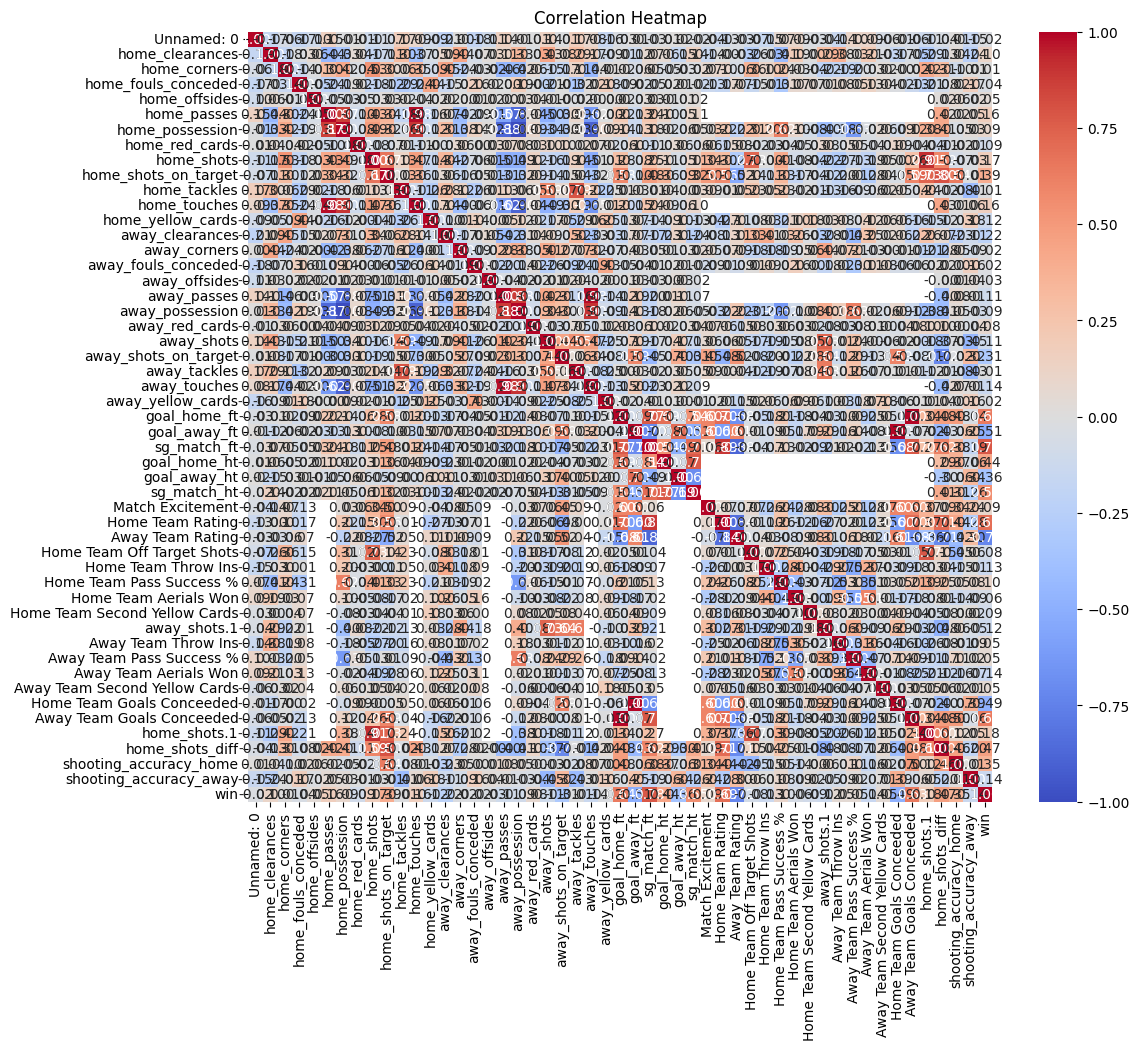

In [113]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns_cols = list(filter(lambda x: '_avg_' not in x and '_acum_' not in x, numeric_columns.columns))
numeric_columns = numeric_columns[numeric_columns_cols]
# Calculate the correlation matrix
df_corr = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [117]:
# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=df_corr.values,
    x=df_corr.columns,
    y=df_corr.columns,
    colorscale='Viridis',
    zmin=-1,
    zmax=1,
    texttemplate='%{text:.2f}',  # Format the values to 2 decimal places
    textfont={"size":10},  # Adjust font size for better visibility
    text=df_corr.values,  # Pass the correlation values as text

))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features')
)

# Show the Plotly heatmap
fig.show()
fig_to_json_file(fig, 'correlation_heatmap')

In [29]:
# shooting accuracy (shots on target / total shots)
df['shooting_accuracy_home'] = df.home_shots_on_target / df.home_shots
df['shooting_accuracy_away'] = df.away_shots_on_target / df.away_shots
df.dropna(subset=['shooting_accuracy_home'], inplace=True) # only one row with NaN
df.dropna(subset=['shooting_accuracy_away'], inplace=True) # only one row with NaN

In [30]:

# Histogram (manual trace instead of px.histogram)
data = df['shooting_accuracy_home']
hist = go.Histogram(
    x=data,
    nbinsx=40,  # Increase the number of bins
    name='Histogram',
    marker=dict(color='blue', opacity=0.6)
)

# # KDE (Kernel Density Estimation)
# kde_x = np.linspace(data.min(), data.max(), 1000)  # Range for KDE curve
# kde_y = gaussian_kde(data)(kde_x)  # KDE values

# kde = go.Scatter(
#     x=kde_x,
#     y=kde_y * len(data) * (data.max() - data.min()) / 40,  # Scale KDE to match histogram
#     mode='lines',
#     name='KDE Curve',
#     line=dict(color='red', width=2)
# )

# Combine the traces into a figure
fig = go.Figure(data=[hist, ])

# Layout updates
fig.update_layout(
    title="Shooting Accuracy Distribution",
    xaxis_title="Shooting Accuracy",
    yaxis_title="Frequency",
    template="plotly_white"
)

# Show the figure
fig.show()
fig_to_json_file(fig, 'shooting_accuracy_distribution')

In [31]:
fig = px.box(df, x='home_team', y='shooting_accuracy_home', title="Shooting Accuracy by Team")

fig.show()
fig_to_json_file(fig, 'shooting_accuracy_by_team')

In [32]:
# 3. Shooting Accuracy vs. Match Result
fig = px.box(df, x='result', y='shooting_accuracy_home', title="Shooting Accuracy vs Match Result")
fig.update_layout(xaxis_title="Match Result", yaxis_title="Shooting Accuracy")
fig.show()
fig_to_json_file(fig, 'shooting_accuracy_vs_match_result')

In [33]:
top_teams = df.groupby('home_team')['shooting_accuracy_home'].mean().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(top_teams, x='home_team', y='shooting_accuracy_home', title="Top 10 Teams by Shooting Accuracy as Home Team")
fig.update_layout(xaxis_title="Team Name", yaxis_title="Average Shooting Accuracy")
fig.show()
fig_to_json_file(fig, 'top_10_teams_shooting_accuracy')

In [34]:
df.head(2)

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,Away Team Aerials Won,Away Team Second Yellow Cards,Home Team Goals Conceeded,Away Team Goals Conceeded,home_shots.1,result,possession_bin,home_shots_diff,shooting_accuracy_home,shooting_accuracy_away
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,NaN,NaN,NaN,NaN,NaN,HW,"[65, 70)",1.0,0.192308,0.285714
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,NaN,NaN,NaN,NaN,NaN,HW,"[50, 55)",3.0,0.238095,0.166667


In [35]:
home_bins = np.arange(0, 1.05, 0.05)  # Bins for shooting_accuracy_home (0% to 100%)
away_bins = np.arange(0, 1.05, 0.05)  # Bins for shooting_accuracy_away (0% to 100%)

# Add binned columns to the DataFrame
df['shooting_accuracy_home_bin'] = pd.cut(df['shooting_accuracy_home'], bins=home_bins, labels=home_bins[:-1])
df['shooting_accuracy_away_bin'] = pd.cut(df['shooting_accuracy_away'], bins=away_bins, labels=away_bins[:-1])

# Step 2: Calculate win probability for each combination of bins
df['win'] = (df['result'] == 'HW').astype(int)  # 1 if home wins, 0 otherwise

grouped = df.groupby(['shooting_accuracy_home_bin', 'shooting_accuracy_away_bin'])
win_probability = grouped['win'].mean().reset_index()

# Ensure the bin columns are numeric for plotting
win_probability['shooting_accuracy_home_bin'] = win_probability['shooting_accuracy_home_bin'].astype(float)
win_probability['shooting_accuracy_away_bin'] = win_probability['shooting_accuracy_away_bin'].astype(float)

# Step 3: Create 3D scatter plot
fig = go.Figure(data=[
    go.Scatter3d(
        x=win_probability['shooting_accuracy_home_bin'],
        y=win_probability['shooting_accuracy_away_bin'],
        z=win_probability['win'],
        mode='markers',
        marker=dict(
            size=5,
            color=win_probability['win'],  # Color by win probability
            colorscale='Viridis',
            colorbar=dict(title='Win Probability'),
            opacity=0.8
        )
    )
])
# Drop rows where 'win' is NaN
win_probability_clean = win_probability.dropna(subset=['win'])

# Fit a plane to the cleaned data
X = win_probability_clean[['shooting_accuracy_home_bin', 'shooting_accuracy_away_bin']].values
y = win_probability_clean['win'].values
reg_model = LinearRegression()
reg_model.fit(X, y)

# Generate grid for the plane
x_range = np.linspace(home_bins.min(), home_bins.max(), 20)
y_range = np.linspace(away_bins.min(), away_bins.max(), 20)
x_grid, y_grid = np.meshgrid(x_range, y_range)
z_grid = reg_model.predict(np.c_[x_grid.ravel(), y_grid.ravel()]).reshape(x_grid.shape)

# Create the plot
fig = go.Figure(data=[
    go.Scatter3d(
        x=win_probability_clean['shooting_accuracy_home_bin'],
        y=win_probability_clean['shooting_accuracy_away_bin'],
        z=win_probability_clean['win'],
        mode='markers',
        marker=dict(
            size=5,
            color=win_probability_clean['win'],  # Color by win probability
            colorscale='Viridis',
            colorbar=dict(title='Win Probability'),
            opacity=0.8
        )
    ),
    go.Surface(
        x=x_grid,
        y=y_grid,
        z=z_grid,
        colorscale='Reds',
        opacity=0.5,
        showscale=False
    )
])

# Layout updates
fig.update_layout(
    title="3D Shooting Accuracy vs Win Probability",
    scene=dict(
        xaxis_title="Shooting Accuracy (Home)",
        yaxis_title="Shooting Accuracy (Away)",
        zaxis_title="Win Probability"
    )
)

fig.show()
fig_to_json_file(fig, 'shooting_accuracy_vs_win_probability_3d')

/var/folders/27/h86gj_fd3xg23kmxw_95c6kc0000gn/T/ipykernel_1468/939925143.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [36]:
df.to_csv('../data/df_full.csv', index=False)

In [55]:
copy_df = df.copy(deep=True)

# copy_df.to_excel('../data/df_full.xlsx', index=False)

In [56]:
# ssh -f -N -L 13389:TS.ENG.BIU.AC.IL:3389 -l chensha5 Lisbon.eng.biu.ac.il -p 2222

In [119]:
copy_df = df.copy(deep=True)

cols = copy_df.columns
filter_col = list(filter(lambda x: '_avg_' in x or '_acum_' in x or x[0].isupper(), cols))
# copy_df = copy_df[filter_col]
copy_df.drop(columns=[
    *filter_col,
    'Unnamed: 0'
    ,'link_match'
    ,'season'
    ,'home_corners'
    ,'home_shots.1'
    ,'away_corners'
    ,'home_offsides'
    ,'away_shots.1'

], inplace=True)
# copy_df.drop('date')
# copy_df.drop('home_shots.1')
def determine_result_excel(row):
    mapping = { 'HW' : 'Home win', 'AW' : 'Away Win', 'D' : 'Draw'}
    v = row['result']
    return mapping[v]

copy_df['result'] = copy_df.apply(determine_result, axis=1)
copy_df.to_excel('../data/df_full_tab.xlsx', index=False, sheet_name='data')

In [63]:
for col in copy_df.columns:
    print(col)

date
home_team
away_team
result_full
result_ht
home_clearances
home_fouls_conceded
home_passes
home_possession
home_red_cards
home_shots
home_shots_on_target
home_tackles
home_touches
home_yellow_cards
away_clearances
away_fouls_conceded
away_offsides
away_passes
away_possession
away_red_cards
away_shots
away_shots_on_target
away_tackles
away_touches
away_yellow_cards
goal_home_ft
goal_away_ft
sg_match_ft
goal_home_ht
goal_away_ht
sg_match_ht
result
possession_bin
home_shots_diff
shooting_accuracy_home
shooting_accuracy_away
shooting_accuracy_home_bin
shooting_accuracy_away_bin
win


In [48]:
copy_df.head(2)

,Unnamed: 0,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,...,Away Team Goals Conceeded,home_shots.1,result,possession_bin,home_shots_diff,shooting_accuracy_home,shooting_accuracy_away,shooting_accuracy_home_bin,shooting_accuracy_away_bin,win
0,0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,...,NaN,NaN,HW,"[65, 70)",1.0,0.192308,0.285714,0.15,0.25,1
1,1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,...,NaN,NaN,HW,"[50, 55)",3.0,0.238095,0.166667,0.20,0.15,1


In [125]:
# Create a heatmap using Plotly
df_corr = copy_df.select_dtypes(include=['number']).corr()
fig = go.Figure(data=go.Heatmap(
    z=df_corr.values,
    x=df_corr.columns,
    y=df_corr.columns,
    colorscale='Viridis',
    zmin=-1,
    zmax=1,
    texttemplate='%{text:.2f}',  # Format the values to 2 decimal places
    textfont={"size":10},  # Adjust font size for better visibility
    text=df_corr.values,  # Pass the correlation values as text

))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features')
)

# Show the Plotly heatmap
fig.show()
fig_to_json_file(fig, 'correlation_heatmap')

In [121]:
copy_df.corr

<bound method DataFrame.corr of             date          home_team             away_team result_full  \
0     2010-11-01          Blackpool  West Bromwich Albion         2-1   
1     2011-04-11          Liverpool       Manchester City         3-0   
2     2010-12-13  Manchester United               Arsenal         1-0   
3     2010-09-13         Stoke City           Aston Villa         2-1   
4     2011-02-14             Fulham               Chelsea         0-0   
...          ...                ...                   ...         ...   
2655         NaN              EIBAR             BARCELONA         0-1   
2656         NaN        REAL MADRID            VILLARREAL         2-1   
2657         NaN            OSASUNA         REAL SOCIEDAD         0-1   
2658         NaN            GRANADA                GETAFE         0-0   
2659         NaN         SEVILLA FC                ALAVÉS         1-0   

     result_ht  home_clearances  home_fouls_conceded  home_passes  \
0          1-0        

In [128]:
home_teams = set(df.home_team.unique())
away_team = set(df['away_team'].unique())

# Use update to add all elements from home_teams to away_team
away_team.update(home_teams)

# Alternatively, you could use the union operator
# away_team = away_team | home_teams

away_team


{'AFC Bournemouth',
 'ALAVÉS',
 'ALMERÍA',
 'ATHLETIC',
 'ATLETICO MADRID',
 'Arsenal',
 'Aston Villa',
 'BARCELONA',
 'Birmingham City',
 'Blackburn Rovers',
 'Blackpool',
 'Bolton Wanderers',
 'Brighton and Hove Albion',
 'Burnley',
 'CELTA',
 'Cardiff City',
 'Chelsea',
 'Crystal Palace',
 'CÁDIZ CF',
 'CÓRDOBA',
 'DEPORTIVO',
 'EIBAR',
 'ELCHE',
 'ESPANYOL',
 'Everton',
 'Fulham',
 'GETAFE',
 'GIJÓN',
 'GIRONA',
 'GRANADA',
 'HUESCA',
 'Huddersfield Town',
 'Hull City',
 'LAS PALMAS',
 'LEGANÉS',
 'LEVANTE',
 'Leeds United',
 'Leicester City',
 'Liverpool',
 'MALLORCA',
 'Manchester City',
 'Manchester United',
 'Middlesbrough',
 'MÁLAGA',
 'Newcastle United',
 'Norwich City',
 'OSASUNA',
 'Queens Park Rangers',
 'RAYO VALLECANO',
 'REAL BETIS',
 'REAL MADRID',
 'REAL SOCIEDAD',
 'Reading',
 'SEVILLA FC',
 'Sheffield United',
 'Southampton',
 'Stoke City',
 'Sunderland',
 'Swansea City',
 'Tottenham Hotspur',
 'VALENCIA',
 'VALLADOLID',
 'VILLARREAL',
 'Watford',
 'West Bromwich Al

In [129]:
team_location_map = {
    'AFC Bournemouth': {'city': 'Bournemouth', 'country': 'England'},
    'ALAVÉS': {'city': 'Vitoria-Gasteiz', 'country': 'Spain'},
    'ALMERÍA': {'city': 'Almería', 'country': 'Spain'},
    'ATHLETIC': {'city': 'Bilbao', 'country': 'Spain'},
    'ATLETICO MADRID': {'city': 'Madrid', 'country': 'Spain'},
    'Arsenal': {'city': 'London', 'country': 'England'},
    'Aston Villa': {'city': 'Birmingham', 'country': 'England'},
    'BARCELONA': {'city': 'Barcelona', 'country': 'Spain'},
    'Birmingham City': {'city': 'Birmingham', 'country': 'England'},
    'Blackburn Rovers': {'city': 'Blackburn', 'country': 'England'},
    'Blackpool': {'city': 'Blackpool', 'country': 'England'},
    'Bolton Wanderers': {'city': 'Bolton', 'country': 'England'},
    'Brighton and Hove Albion': {'city': 'Brighton', 'country': 'England'},
    'Burnley': {'city': 'Burnley', 'country': 'England'},
    'CELTA': {'city': 'Vigo', 'country': 'Spain'},
    'Cardiff City': {'city': 'Cardiff', 'country': 'Wales'},
    'Chelsea': {'city': 'London', 'country': 'England'},
    'Crystal Palace': {'city': 'London', 'country': 'England'},
    'CÁDIZ CF': {'city': 'Cádiz', 'country': 'Spain'},
    'CÓRDOBA': {'city': 'Córdoba', 'country': 'Spain'},
    'DEPORTIVO': {'city': 'A Coruña', 'country': 'Spain'},
    'EIBAR': {'city': 'Eibar', 'country': 'Spain'},
    'ELCHE': {'city': 'Elche', 'country': 'Spain'},
    'ESPANYOL': {'city': 'Barcelona', 'country': 'Spain'},
    'Everton': {'city': 'Liverpool', 'country': 'England'},
    'Fulham': {'city': 'London', 'country': 'England'},
    'GETAFE': {'city': 'Getafe', 'country': 'Spain'},
    'GIJÓN': {'city': 'Gijón', 'country': 'Spain'},
    'GIRONA': {'city': 'Girona', 'country': 'Spain'},
    'GRANADA': {'city': 'Granada', 'country': 'Spain'},
    'HUESCA': {'city': 'Huesca', 'country': 'Spain'},
    'Huddersfield Town': {'city': 'Huddersfield', 'country': 'England'},
    'Hull City': {'city': 'Hull', 'country': 'England'},
    'LAS PALMAS': {'city': 'Las Palmas', 'country': 'Spain'},
    'LEGANÉS': {'city': 'Leganés', 'country': 'Spain'},
    'LEVANTE': {'city': 'Valencia', 'country': 'Spain'},
    'Leeds United': {'city': 'Leeds', 'country': 'England'},
    'Leicester City': {'city': 'Leicester', 'country': 'England'},
    'Liverpool': {'city': 'Liverpool', 'country': 'England'},
    'MALLORCA': {'city': 'Palma', 'country': 'Spain'},
    'Manchester City': {'city': 'Manchester', 'country': 'England'},
    'Manchester United': {'city': 'Manchester', 'country': 'England'},
    'Middlesbrough': {'city': 'Middlesbrough', 'country': 'England'},
    'MÁLAGA': {'city': 'Málaga', 'country': 'Spain'},
    'Newcastle United': {'city': 'Newcastle upon Tyne', 'country': 'England'},
    'Norwich City': {'city': 'Norwich', 'country': 'England'},
    'OSASUNA': {'city': 'Pamplona', 'country': 'Spain'},
    'Queens Park Rangers': {'city': 'London', 'country': 'England'},
    'RAYO VALLECANO': {'city': 'Madrid', 'country': 'Spain'},
    'REAL BETIS': {'city': 'Seville', 'country': 'Spain'},
    'REAL MADRID': {'city': 'Madrid', 'country': 'Spain'},
    'REAL SOCIEDAD': {'city': 'San Sebastián', 'country': 'Spain'},
    'Reading': {'city': 'Reading', 'country': 'England'},
    'SEVILLA FC': {'city': 'Seville', 'country': 'Spain'},
    'Sheffield United': {'city': 'Sheffield', 'country': 'England'},
    'Southampton': {'city': 'Southampton', 'country': 'England'},
    'Stoke City': {'city': 'Stoke-on-Trent', 'country': 'England'},
    'Sunderland': {'city': 'Sunderland', 'country': 'England'},
    'Swansea City': {'city': 'Swansea', 'country': 'Wales'},
    'Tottenham Hotspur': {'city': 'London', 'country': 'England'},
    'VALENCIA': {'city': 'Valencia', 'country': 'Spain'},
    'VALLADOLID': {'city': 'Valladolid', 'country': 'Spain'},
    'VILLARREAL': {'city': 'Villarreal', 'country': 'Spain'},
    'Watford': {'city': 'Watford', 'country': 'England'},
    'West Bromwich Albion': {'city': 'West Bromwich', 'country': 'England'},
    'West Ham United': {'city': 'London', 'country': 'England'},
    'Wigan Athletic': {'city': 'Wigan', 'country': 'England'},
    'Wolverhampton Wanderers': {'city': 'Wolverhampton', 'country': 'England'},
}


In [132]:
# corelation between ht and ft of results
# create a new df that map team to city and country
# Convert the dictionary to a DataFrame
df_teams = pd.DataFrame.from_dict(team_location_map, orient='index').reset_index()
df_teams.columns = ['team', 'city', 'country']




In [133]:
df_teams.to_excel('../data/teams_to_location.xlsx', sheet_name='teams')